In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('train.csv')

## Data Preprocessing

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train.shape

(891, 12)

In [6]:
data=train.drop(["Name","Ticket","Cabin","PassengerId"],axis=1)

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
data["Embarked"].fillna('S',inplace=True)
data["Embarked"].replace({'S':1,'Q':2,'C':3},inplace=True)
data["Sex"].replace({'male':0,'female':1},inplace=True)
data['Age'] = data['Age'].fillna(data['Age'].median())

In [9]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,3
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


# Model Building

## Linear Regression

In [11]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.drop(['Survived'], axis='columns')
y = data['Survived']

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
lr.fit(X_train, y_train)
y_pred_lr_1 = lr.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_lr_1),4))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_lr_1),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr_1)),4))
print('R-squared Error:', round(metrics.r2_score(y_test, y_pred_lr_1), 4))
print('Accuracy:', str(format(metrics.r2_score(y_test, y_pred_lr_1)*100, '.3f')) + '%')

Mean Absolute Error: 0.3056
Mean Squared Error: 0.1571
Root Mean Squared Error: 0.3964
R-squared Error: 0.3494
Accuracy: 34.936%


## KNN

In [12]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 

X = data.drop(['Survived'], axis='columns')
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))
print('R-squared Error:', round(metrics.r2_score(y_test, y_pred), 4))
print('Accuracy:', str(format(knn.score(X_test, y_test)*100, '.3f')) + '%')

Mean Absolute Error: 0.3598
Mean Squared Error: 0.2132
Root Mean Squared Error: 0.4617
R-squared Error: 0.1173
Accuracy: 11.726%


## Naives Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

X = data.drop(['Survived'], axis='columns')
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

model = GaussianNB()                       
model.fit(X_train, y_train)
y_model = model.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_model),4))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_model),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_model)),4))
print('R-squared Error:', round(metrics.r2_score(y_test, y_model), 4))
print('Accuracy:', str(format(accuracy_score(y_test,y_model)*100, '.3f')) + '%')

Mean Absolute Error: 0.2402
Mean Squared Error: 0.2402
Root Mean Squared Error: 0.4901
R-squared Error: 0.0053
Accuracy: 75.978%


## Support Vector Machines

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X = data.drop(['Survived'], axis='columns')
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))
print('R-squared Error:', round(metrics.r2_score(y_test, y_pred), 4))
print('Accuracy:', str(format(metrics.r2_score(y_test, y_pred)*100, '.3f')) + '%')

Mean Absolute Error: 0.2235
Mean Squared Error: 0.2235
Root Mean Squared Error: 0.4727
R-squared Error: 0.0747
Accuracy: 7.470%


## Comparing all the models

In [15]:
res = {'LR':{'MAE':round(metrics.mean_absolute_error(y_test, y_pred_lr_1),4),
                   'MSE':round(metrics.mean_squared_error(y_test, y_pred_lr_1),4),
                   'RMSE':round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr_1)),4),
                   'R2':round(metrics.r2_score(y_test, y_pred_lr_1), 4)},
             'KNN':{'MAE':round(metrics.mean_absolute_error(y_test, y_pred),4),
                   'MSE':round(metrics.mean_squared_error(y_test, y_pred),4),
                   'RMSE':round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4),
                   'R2':round(metrics.r2_score(y_test, y_pred), 4)},
             'Naives Bayes':{'MAE':round(metrics.mean_absolute_error(y_test, y_model),4),
                   'MSE':round(metrics.mean_squared_error(y_test, y_model),4),
                   'RMSE':round(np.sqrt(metrics.mean_squared_error(y_test, y_model)),4),
                   'R2':round(metrics.r2_score(y_test, y_model), 4)},
             'SVM':{'MAE':round(metrics.mean_absolute_error(y_test, y_pred),4),
                   'MSE':round(metrics.mean_squared_error(y_test, y_pred),4),
                   'RMSE':round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4),
                   'R2':round(metrics.r2_score(y_test, y_pred), 4)}
      }

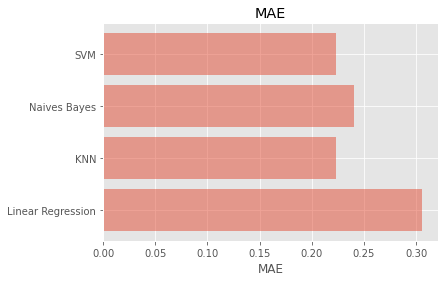

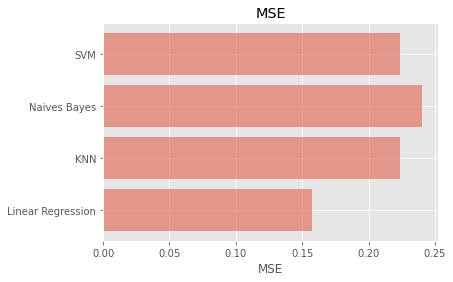

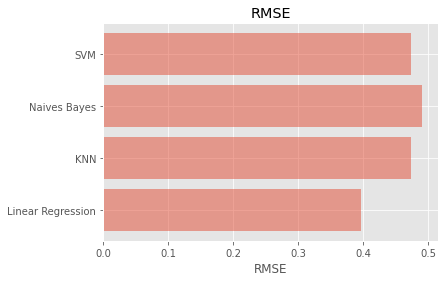

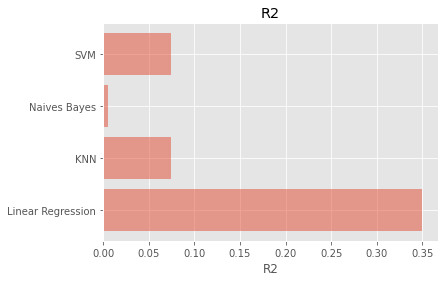

In [16]:
for metric in ['MAE', 'MSE', 'RMSE', 'R2']:
    objects = ('Linear Regression', 'KNN', 'Naives Bayes', 'SVM')
    y_pos = np.arange(len(objects))
    performance = [res['LR'][metric], 
                   res['KNN'][metric],
                   res['Naives Bayes'][metric],
                   res['SVM'][metric]]

    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(metric)
    plt.title(metric)

    plt.show()

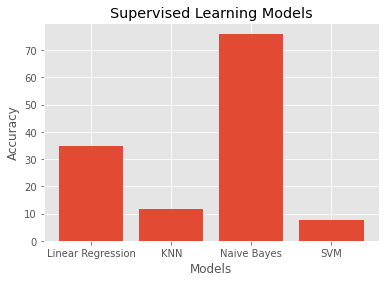

In [17]:
model = ['Linear Regression', 'KNN', 'Naive Bayes', 'SVM']
acc = [34.936, 11.726, 75.978, 7.47]

plt.bar(model, acc)
plt.title('Supervised Learning Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# From the above chart, we can conclude that Linear Regression and Naive Bayes has the highest accuracy values.